In [ ]:
# Suponha que você tenha um conjunto de dados que inclui características das máquinas (potência, eficiência, 
# idade, tamanho etc.) e uma variável de destino que inidca se a máquina é "Eficiente" ou "Ineficiente" em 
# termos de consumo de energia. O objetivo é criar um modelo SVM para classificar as máquinas. Antes de treinar 
# o modelo, que etapas você deve seguir para preparar os dados?

#'Potência (KW)'[120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
#'Eficiência (%)'[92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
#'Idade (anos)'[3, 8, 5, 4, 7, 2, 10, 6, 3, 9]
#'Tamanho(m2)'[50, 45, 55, 60, 48, 62, 40, 58, 56, 47]
#'Consumo de Energia'['Eficiente', 'ineficiente', 'ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']

In [31]:
import pandas as pd

dados = pd.DataFrame({
    'Potência (KW)': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiência (%)': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade (anos)': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho (m2)': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente',
                           'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})

dados['Consumo de Energia'] = dados['Consumo de Energia'].str.lower().map({'eficiente': 1, 'ineficiente': 0})
print(dados.head())


   Potência (KW)  Eficiência (%)  Idade (anos)  Tamanho (m2)  \
0            120              92             3            50   
1             80              65             8            45   
2            100              75             5            55   
3            110              85             4            60   
4             90              68             7            48   

   Consumo de Energia  
0                   1  
1                   0  
2                   0  
3                   1  
4                   0  


In [20]:
X = dados.iloc[:, :-1].values
y = dados.iloc[:, -1].values

In [32]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)


In [34]:
from sklearn.svm import SVC

modelo = SVC(kernel='linear', random_state=42)
modelo.fit(X_treino, y_treino)


SVC(kernel='linear', random_state=42)

In [35]:
y_pred = modelo.predict(X_teste)
print("Previsões:", y_pred)

Previsões: [1 0 1]


In [37]:
from sklearn.metrics import accuracy_score

print("Acurácia:", accuracy_score(y_teste, y_pred))

Acurácia: 1.0


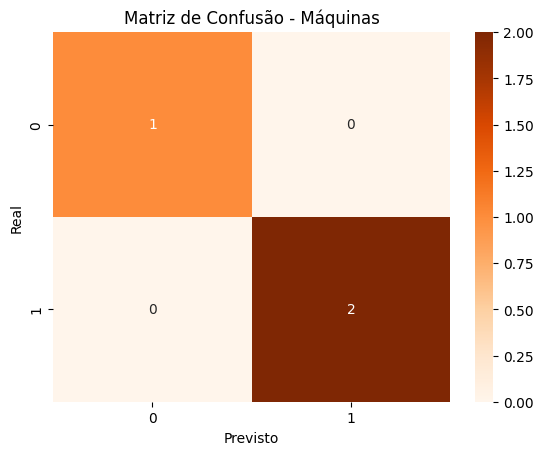

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusão - Máquinas")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Reutilizar X e y já preparados
modelo = SVC(kernel='linear', random_state=42)

scores = cross_val_score(modelo, X, y, cv=5)  # 5-fold cross-validation
print("Scores por fold:", scores)
print("Acurácia média:", scores.mean())


Scores por fold: [1.  0.5 1.  1.  1. ]
Acurácia média: 0.9
